In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

#Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
from code import tools as tl
from code.fbprophet import prophet_util as fp

Importing plotly failed. Interactive plots will not work.


#### Load and process data

In [4]:
###################

In [20]:
df = tl.load_data('./data/sample_data.csv') #read in data from file
df = tl.prepare_data(df,'Date', 'Weekly_Sales') # select 'ds' and 'y'
df.head()

,ds,y,IsHoliday
0,2010-05-02,24924.50,False
1,2010-12-02,46039.49,True
2,2010-02-19,41595.55,False
3,2010-02-26,19403.54,False
4,2010-05-03,21827.90,False


In [1]:

df1 = tl.group_by_date(df, 'D','2010-01-01','2012-12-31') # group by date
df1.shape

NameError: name 'tl' is not defined

In [22]:
df_tr, df_tst = tl.train_test_split(df1,'2011-12-31','2012-12-31')

train shape (24, 3)
test shape (12, 3)


In [ ]:
#######################

In [40]:
df = tl.load_data('./data/For Naomi.csv')
df = tl.prepare_data(df,'消費日期','消費金額')

In [41]:
# period = 365, freq = 'D' , daily
# peroid = 12, freq = 'MS', monthly
freq = 'D'
period = 365

df1 = tl.group_by_date(df, freq, '2015-01-01', '2020-08-31') 

In [42]:
df1.head()

,ds,y,交易筆數
0,2015-01-01,6461489,4385
1,2015-01-02,5653286,3807
2,2015-01-03,5377801,3638
3,2015-01-04,5401276,4057
4,2015-01-05,2650453,2003


#### Split data for training and testing

In [43]:
df_tr, df_tst = tl.train_test_split(df1,'2017-12-31','2018-12-31')

train shape (1094, 3)
test shape (365, 3)


### Model Training

In [44]:
prophet = fp.Prophet_Impl(df_tr,df_tst)

#### Hyperparmeter tuning

In [45]:
# Generate all combinations of parameters
params_grid = {'seasonality_mode':['multiplicative','additive'], 
               'changepoint_prior_scale': [0.001, 0.002, 0.005, 0.05, 0.5],  # default 0.05, reasonable range [0.001, 0.5]
               'seasonality_prior_scale': [0.01, 0.02, 0.05, 0.1, 1, 10.0],  # default 10, reasonable range [0.01, 10]
               'changepoint_range' : [0.8, 0.85, 0.9, 0.95] 
              }

all_params = fp.generate_all_params(params_grid)

Total Possible Models 240


In [ ]:
'''
tuning data: '2018-01-01', '2018-12-31'
adjust period, freq for different prediction result,
ex: period = 365, freq = 'D', or peroid = 12, freq = 'MS'
'''
best_params, tuning_results = fp.hyperparam_tuning(all_params,df_tr, df_tst, 
                     '2018-01-01', '2018-12-31',period = period, freq = freq) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [26]:
best_params

{'changepoint_prior_scale': 0.5,
 'changepoint_range': 0.85,
 'seasonality_mode': 'multiplicative',
 'seasonality_prior_scale': 0.02}

#### Use best parameters to train the model

In [27]:
df_tr, df_tst = tl.train_test_split(df1,'2018-12-31','2019-12-31')

train shape (1459, 3)
test shape (365, 3)


In [28]:
prophet = fp.Prophet_Impl(df_tr,df_tst)

In [29]:
prophet.train(**best_params)
prophet.predict(period, freq)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
prophet.forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2015-01-01,4.848318e+06,9.124588e+05,7.707235e+06,4.848318e+06,4.848318e+06,-0.099634,-0.099634,-0.099634,-0.046396,-0.046396,-0.046396,-0.053238,-0.053238,-0.053238,0.0,0.0,0.0,4.365261e+06
1,2015-01-02,4.848285e+06,1.175435e+06,7.965582e+06,4.848285e+06,4.848285e+06,-0.068745,-0.068745,-0.068745,-0.019409,-0.019409,-0.019409,-0.049336,-0.049336,-0.049336,0.0,0.0,0.0,4.514990e+06
2,2015-01-03,4.848251e+06,2.411415e+06,9.462570e+06,4.848251e+06,4.848251e+06,0.184905,0.184905,0.184905,0.230662,0.230662,0.230662,-0.045757,-0.045757,-0.045757,0.0,0.0,0.0,5.744719e+06
3,2015-01-04,4.848218e+06,2.554107e+06,9.563119e+06,4.848218e+06,4.848218e+06,0.212704,0.212704,0.212704,0.255275,0.255275,0.255275,-0.042571,-0.042571,-0.042571,0.0,0.0,0.0,5.879454e+06
4,2015-01-05,4.848185e+06,6.003423e+05,7.655213e+06,4.848185e+06,4.848185e+06,-0.148505,-0.148505,-0.148505,-0.108669,-0.108669,-0.108669,-0.039836,-0.039836,-0.039836,0.0,0.0,0.0,4.128207e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,2019-08-01,9.022545e+06,2.505519e+06,1.464460e+07,4.090922e+06,1.436007e+07,-0.064193,-0.064193,-0.064193,-0.046396,-0.046396,-0.046396,-0.017797,-0.017797,-0.017797,0.0,0.0,0.0,8.443364e+06
1467,2019-09-01,9.356052e+06,2.818076e+06,1.842048e+07,3.374154e+06,1.622087e+07,0.107734,0.107734,0.107734,0.255275,0.255275,0.255275,-0.147541,-0.147541,-0.147541,0.0,0.0,0.0,1.036402e+07
1468,2019-10-01,9.678801e+06,1.249441e+06,1.560093e+07,2.192118e+06,1.792586e+07,-0.185410,-0.185410,-0.185410,-0.165665,-0.165665,-0.165665,-0.019746,-0.019746,-0.019746,0.0,0.0,0.0,7.884253e+06
1469,2019-11-01,1.001231e+07,1.168657e+06,2.520801e+07,1.389311e+06,1.974529e+07,0.284196,0.284196,0.284196,-0.019409,-0.019409,-0.019409,0.303605,0.303605,0.303605,0.0,0.0,0.0,1.285776e+07


#### Evaluatin of the result

In [31]:
df_pred = tl.slice_df(prophet.forecast,'2019-01-01', '2019-12-31', ['ds','yhat'])
tl.calc_mape(df_pred, df_tst, freq,'2019-01-01', '2019-12-31')

18.023958656119824

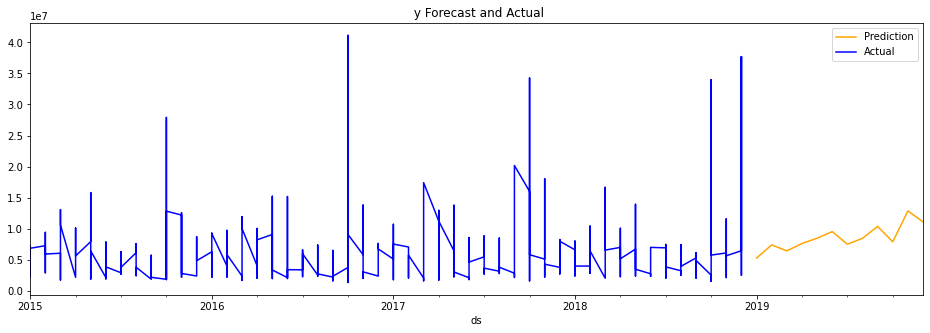

In [32]:
tl.plot_predict_and_actual(df_pred, df_tr)

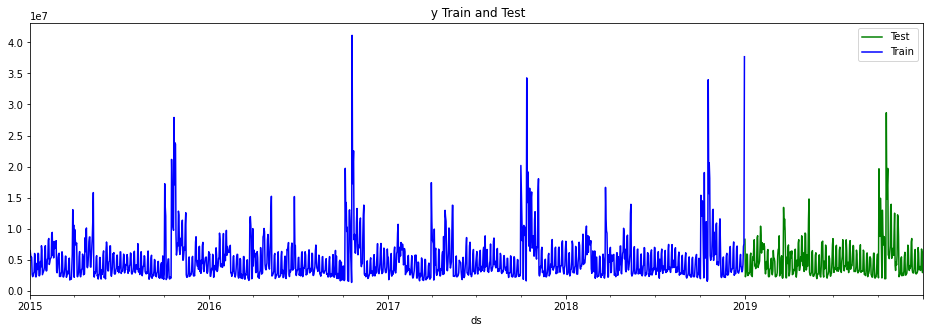

In [33]:
tl.plot_train_and_test(df_tst, df_tr)

(12, 2) (12, 3)


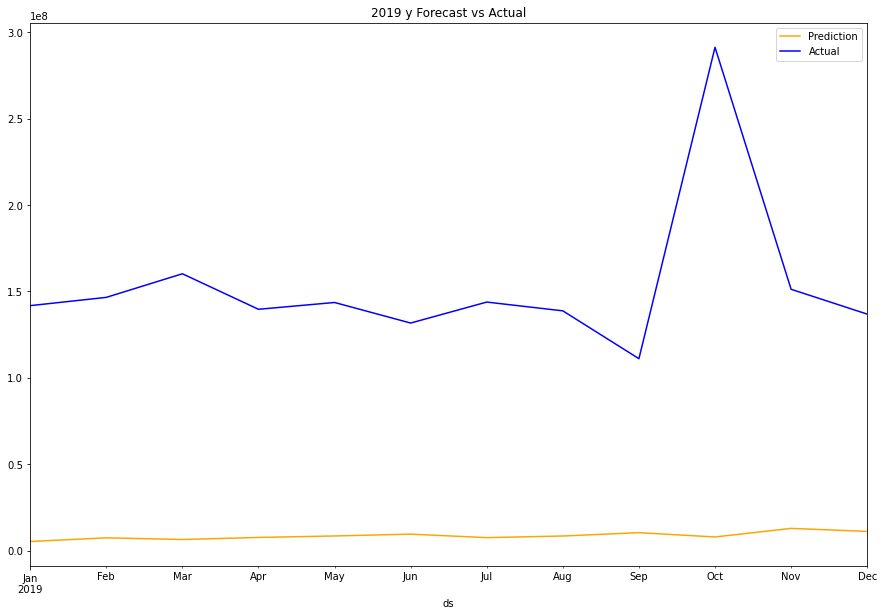

In [34]:
tl.plot_predict_vs_actual(df_pred, df_tst, freq, '2019-01-01', '2019-12-31')

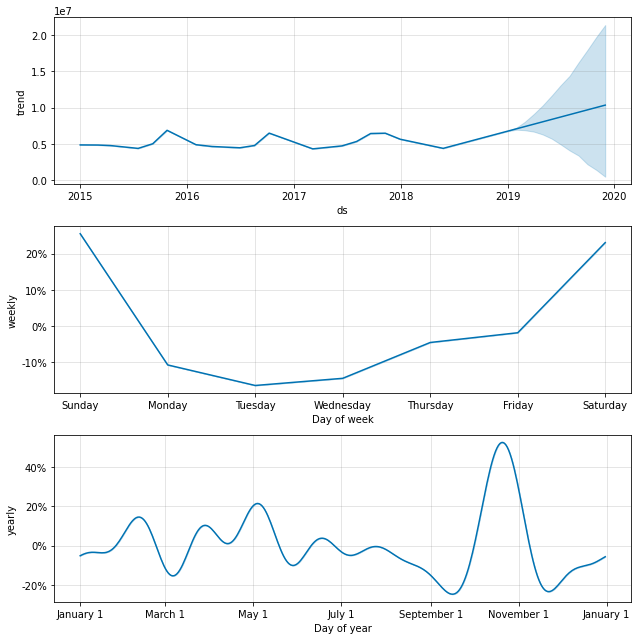

In [35]:
# Plot the components of the model
fig2=prophet.model.plot_components(prophet.forecast)

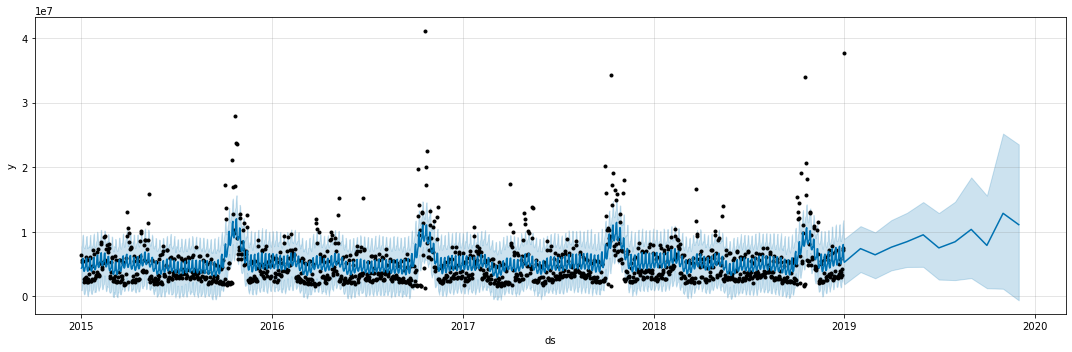

In [36]:
# Plot the forecast
fig, ax = plt.subplots(figsize=(15,5))
fig = prophet.model.plot(prophet.forecast,ax=ax)
plt.show()

In [37]:
tl.save_to_file(prophet.forecast, ['ds','yhat'],'test.csv' )